# 1) Bussines Understanding

- Analyzing the content of an E-commerce database that lists purchases made by  4000 customers over a period of one year (from 2010/12/01 to 2011/12/09)
- Using RFM(Recency, Frequency, Monetary) analysis for customer segmentation.
- Using KMeans Model for clustering and analysis the result.
- Based on this analysis Ddeveloing a model that allows to anticipate the new customer's cluster.

- The columns are:
1) InvoiceNo: is a unique, sequential number assigned to each invoice.
2) StockCode: identify a unique numbervassigned to each product.
3) Description: for the product name.
4) Quantity: of each type of the products.
5) InvoiceDate
6) UnitPrice
7) CustomerID: uniquely assigned to each customer.
8) Country

# 2) Data Preparation

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

import scipy.cluster.hierarchy as sch
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)
%matplotlib inline

In [2]:
DataFrame=pd.read_csv('data.csv', encoding="ISO-8859-1")
DataFrame


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df=DataFrame.copy()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
for col in df.columns:
    print(col + '\n------')
    print(df[col].value_counts())
    print('---------------------')

InvoiceNo
------
InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64
---------------------
StockCode
------
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: count, Length: 4070, dtype: int64
---------------------
Description
------
Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERT

In [7]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df = df.dropna()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [9]:
df[~df['InvoiceNo'].str.contains('C')]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# 3) RFM Analysis & Visalization

In [10]:
df['TotalPrice']=df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [11]:
random_rows = df.sample(n=20)
random_rows = random_rows[['Quantity', 'Country']]
random_rows

,Quantity,Country
333536,2,United Kingdom
401032,4,United Kingdom
142261,1,United Kingdom
144433,2,United Kingdom
369266,6,United Kingdom
407905,6,United Kingdom
399504,12,United Kingdom
401470,3,United Kingdom
460188,1,United Kingdom
151457,1,United Kingdom


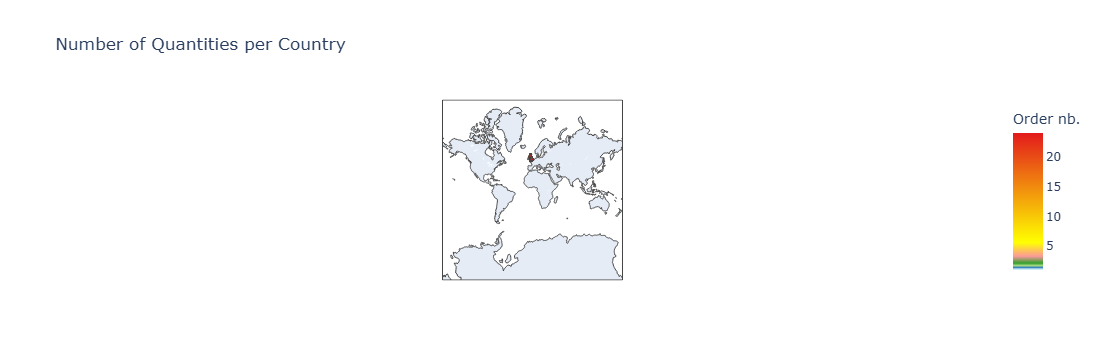

In [12]:

countries = pd.DataFrame(random_rows)
countries.set_index('Country', inplace=True)

# Now you can use 'countries' in your choropleth map
data = dict(
    type='choropleth',
    locations=countries.index,
    locationmode='country names',
    z=countries['Quantity'],
    text=countries.index,
    colorbar={'title':'Order nb.'},
    colorscale=[
        [0, 'rgb(224,255,255)'],
        [0.01, 'rgb(166,206,227)'],
        [0.02, 'rgb(31,120,180)'],
        [0.03, 'rgb(178,223,138)'],
        [0.05, 'rgb(51,160,44)'],
        [0.10, 'rgb(251,154,153)'],
        [0.20, 'rgb(255,255,0)'],
        [1, 'rgb(227,26,28)']
    ],
    reversescale=False
)


layout = dict(
    title='Number of Quantities per Country',
    geo=dict(showframe=True, projection={'type':'mercator'})
)

choromap = go.Figure(data=[data], layout=layout)
iplot(choromap, validate=False)

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
now = datetime( 2011, 12, 11 )
x=df['InvoiceDate']
x

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [14]:
# RFM Calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,  # Recency
    'CustomerID': 'count',                         # Frequency
    'TotalPrice': 'sum'                            # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'CustomerID': 'Frequency', 'TotalPrice': 'Monetary'})
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [15]:
rfm= rfm[rfm['Monetary'] > 0]
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
12352.0,37,95,1545.41
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [16]:
rfm.describe()

,Recency,Frequency,Monetary
count,4322.000000,4322.000000,4.322000e+03
mean,90.876215,94.059695,1.923483e+03
std,99.137727,233.621415,8.263128e+03
min,1.000000,1.000000,1.776357e-15
25%,17.000000,18.000000,3.022925e+02
50%,50.000000,42.000000,6.575500e+02
75%,139.000000,102.750000,1.625740e+03
max,374.000000,7983.000000,2.794890e+05


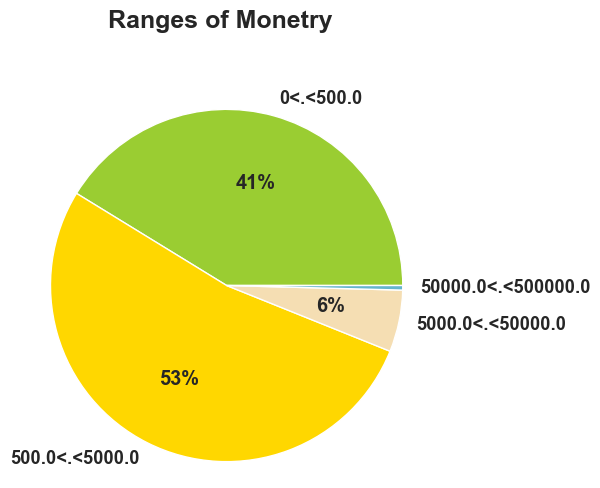

In [17]:
price_range = [ 0, 50e+01, 50e+02, 50e+03, 50e+04]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = rfm[(rfm['Monetary'] < price) &
                       (rfm['Monetary'] > price_range[i-1])]['Monetary'].count()
    count_price.append(val)
#____________________________________________
# Représentation du nombre d'achats / montant        
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5, 5))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Ranges of Monetry", ha='center', fontsize = 18);

In [18]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine RFM scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12347.0,3,182,4310.00,4,4,4,444
12348.0,76,31,1797.24,2,2,4,224
12349.0,19,73,1757.55,3,3,4,334
12350.0,311,17,334.40,1,1,2,112
12352.0,37,95,1545.41,3,3,3,333
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111
18281.0,181,7,80.82,1,1,1,111
18282.0,8,13,176.60,4,1,1,411


# 4) Data preprocessing & Machine learning

In [55]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [57]:
x = rfm[['Recency', 'Frequency', 'Monetary']]

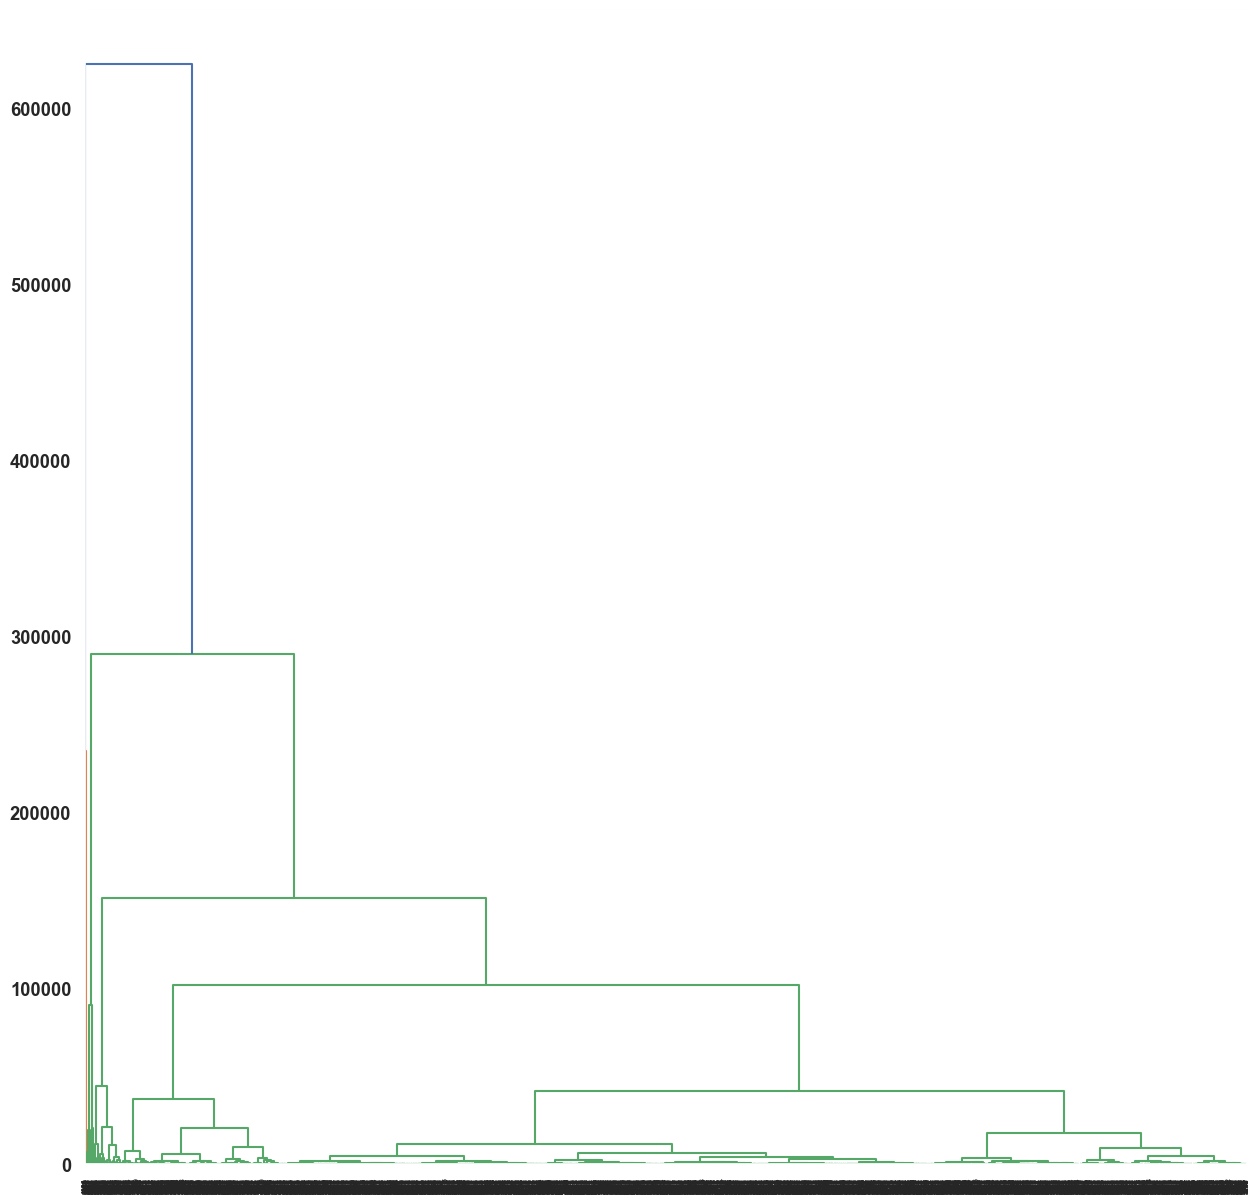

In [58]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

In [68]:
model = KMeans(n_clusters=3)
y_labels = model.fit_predict(x)
y_labels

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
model.predict([[10, 236, 100000]])

array([2])

In [70]:
model.inertia_

49245668518.02238

Text(0, 0.5, 'Score')

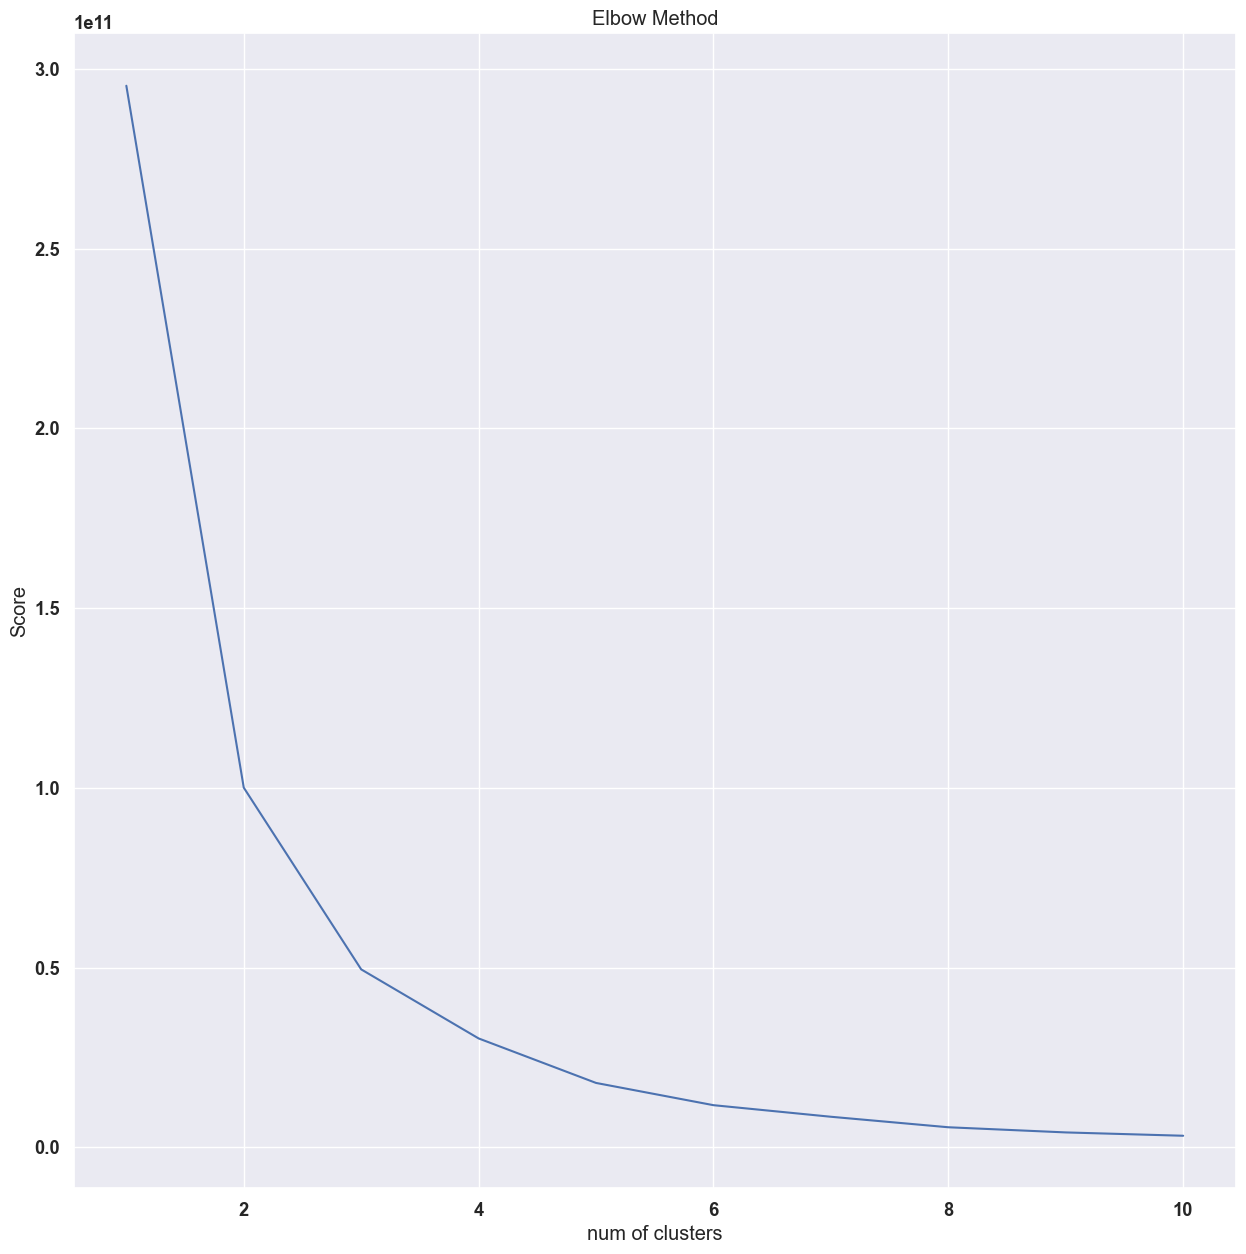

In [76]:
scores = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(x)
    scores.append(model.inertia_)
plt.plot(range(1, 11), scores)
plt.title("Elbow Method")
plt.xlabel("num of clusters")
plt.ylabel("Score")

In [88]:
# from the scores, turns out the best clusters number is 5
model = KMeans(n_clusters=5)
y_labels = model.fit_predict(x)
y_labels

array([4, 4, 4, ..., 4, 4, 4])

# 5)  Result Analysis & Test Custom Data

In [89]:
rfm['Cluster'] = model.labels_
rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Cluster
CustomerID,,,,,,,,
12347.0,3,182,4310.00,4,4,4,444,4
12348.0,76,31,1797.24,2,2,4,224,4
12349.0,19,73,1757.55,3,3,4,334,4
12350.0,311,17,334.40,1,1,2,112,4
12352.0,37,95,1545.41,3,3,3,333,4
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,4
18281.0,181,7,80.82,1,1,1,111,4
18282.0,8,13,176.60,4,1,1,411,4


In [90]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
})
cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,21.274436,340.048872,8102.486015
1,9.800000,1905.600000,129057.952000
2,7.333333,1133.296296,40928.794815
3,1.500000,1259.000000,267963.755000
4,96.185480,67.983093,962.640215


In [91]:
model.predict([[10, 236, 100000]])

array([1])

# 6) Save Model

In [92]:
import joblib

In [93]:
joblib.dump(model, 'model.h5')

['model.h5']

In [97]:
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

In [98]:
x

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
12352.0,37,95,1545.41
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60
